Centro de Inovação em Inteligência Artificial para a Saúde da UFMG

**Curso de Introdução à Análise de Dados em Saúde com Python**

**Prof. Juliano Gaspar** - Faculdade de Medicina da UFMG

Mais informações: https://ciia-saude.medicina.ufmg.br/

**Importante!**

*   Esta aula é apenas um RESUMO do Curso de Qualidade de Dados.
*   Diversos assuntos não são abordados nessas aulas, como alguns filtros, seleções, remoção de duplicados e valores nulos.
*   Recomendamos fortemente que você faça o Curso de Qualidade de Dados, para saber mais.

# **RESUMO: Manipulação, Limpeza e Tratamento de Dados**

* Seleção e filtros
* Análise da qualidade das variáveis numéricas
* Recodificação de variáveis
* Criação de variáveis
* Salvando a base de dados corrigida

# Abrir a base de dados

In [1]:
# Importar as bibliotecas para trabalhar com base de dados e gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

In [2]:
# Endereço do arquivo com a base de dados
arquivo = 'https://ftp.medicina.ufmg.br/cursosciia/iads/BD_PARTOS_original.xlsx'

# Ler todos os dados e colocar na variável dados
dados = pd.read_excel(arquivo)

# Mostrar destalhes/informações das variáveis importadas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DT_INTERNACAO       1709 non-null   datetime64[ns]
 1   DT_ALTA             1709 non-null   datetime64[ns]
 2   DURACAO_INT         1709 non-null   float64       
 3   GESTACOES           1709 non-null   int64         
 4   PARTOS              1708 non-null   float64       
 5   IG_OBSTETRA         1689 non-null   float64       
 6   IG_PEDIATRA         1706 non-null   float64       
 7   ALTO_RISCO          1709 non-null   object        
 8   TIPO_PARTO          1709 non-null   int64         
 9   HIPERTENSAO         1709 non-null   int64         
 10  GEMELAR             1709 non-null   int64         
 11  CESAREAS_PREVIAS    1702 non-null   float64       
 12  EPISIOTOMIA         1709 non-null   int64         
 13  ANALGESIA           1709 non-null   int64       

**Tipos de variáveis**

*   **int64** = números inteiros
*   **float64** = números decimais
*   **object** = textos / strings
*   **datetime64** = datas

**Algumas designações**
* non-null = não nulos (válidos)
* null = nulos, missings, vazios, não preenchido
* NAN (Not A Number) = por alguma razão o valor da variável não é um número (tem um texto, tem um resultado inexperado)


In [3]:
# Mostrar um resumo dos dados (as 5 primeiras linhas e 5 últimas 5 linhas)
dados

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.0,0.0,Jardim Montanhês,-19.805260,-43.964157
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.0,111.0,São Lucas,-19.890446,-43.956734
1707,2013-10-04,2013-11-28,54.895833,3,0.0,27.0,34.0,sim,2,0,...,9.0,1,1,0,2660.0,2675.0,3.0,Nossa Senhora de Fátima,-19.906525,-43.889401


# Seleção e filtro de dados

In [4]:
# Mostrar um resumo dos dados de 10 linhas aleatórias
dados.sample(10)

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
88,2013-12-22,2013-12-23,1.081944,3,2.0,40.0,39.0,não,1,0,...,9.0,0,2,0,3090.0,3130.0,1.0,Céu Azul,-19.972366,-43.982689
1233,2014-01-21,2014-01-24,2.715278,1,0.0,38.0,38.0,sim,2,0,...,9.0,0,2,0,2140.0,2100.0,0.0,São Gabriel,-19.916807,-44.005417
578,2013-12-23,2013-12-25,1.841667,1,0.0,41.0,41.0,não,1,0,...,10.0,0,1,0,2050.0,2710.0,3.0,Venda Nova,-19.918180,-43.904159
894,2014-01-31,2014-02-02,2.096528,6,3.0,39.0,39.0,sim,1,0,...,9.0,0,2,0,2645.0,2730.0,104.0,Nossa Senhora de Fátima,-19.911976,-43.893547
693,2014-01-30,2014-02-01,1.968750,1,0.0,40.0,40.0,sim,1,0,...,9.0,0,2,0,3325.0,3165.0,0.0,Vera Cruz,-20.004913,-44.023640
709,2013-12-19,2013-12-21,1.979167,1,0.0,41.0,40.0,não,1,0,...,10.0,0,2,0,2900.0,2905.0,1.0,Pindorama,-19.951426,-43.966949
808,2013-10-28,2013-10-30,2.044444,2,1.0,39.0,39.0,sim,2,0,...,9.0,1,2,0,4230.0,4070.0,0.0,Vera Cruz,-19.893021,-43.898987
573,2014-05-29,2014-05-31,1.833333,2,1.0,37.0,37.0,sim,1,0,...,10.0,0,2,0,2900.0,2905.0,0.0,Jaqueline,-19.930183,-43.961239
1059,2014-03-21,2014-03-23,2.333333,7,5.0,39.0,39.0,sim,1,0,...,9.0,0,0,0,NaN,2730.0,1.0,Inconfidência,-19.852236,-43.884686
1228,2014-05-28,2014-05-31,2.702083,3,1.0,40.0,40.0,sim,2,0,...,10.0,0,2,0,NaN,2995.0,3.0,Venda Nova,-19.891838,-43.982529


In [5]:
# Acessar os dados de uma Series (coluna)

# Forma simples: se a coluna for sem espaços
dados.TIPO_PARTO

,TIPO_PARTO
0,1
1,1
2,1
3,1
4,1
...,...
1704,1
1705,2
1706,2
1707,2


In [6]:
# Forma padrão: para todo tipo de título de coluna, incluindo com espaços
dados['TIPO_PARTO']

,TIPO_PARTO
0,1
1,1
2,1
3,1
4,1
...,...
1704,1
1705,2
1706,2
1707,2


In [7]:
# Localizar e visualizar um sub-conjunto de dados
dados.loc[ (dados.APGAR1 <  7 ) ]

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
7,2013-10-07,2013-10-08,0.845139,2,1.0,39.0,39.0,não,1,0,...,9.0,0,1,0,3160.0,3135.0,0.0,Inconfidência,-19.964521,-43.919651
42,2013-12-06,2013-12-07,0.986111,3,2.0,39.0,39.0,não,1,0,...,8.0,0,1,0,NaN,NaN,58.0,Mariano de Abreu,-19.832577,-43.981976
52,2014-04-13,2014-04-14,1.013889,2,1.0,22.0,22.0,não,1,0,...,1.0,0,0,0,2390.0,2400.0,1.0,Bandeirantes,-19.913586,-43.947582
54,2014-04-13,2014-04-14,1.013889,2,1.0,22.0,22.0,não,1,0,...,1.0,0,0,0,NaN,3410.0,136.0,Paraíso,-19.888601,-43.901932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,2013-10-07,2013-11-01,24.634722,3,3.0,26.0,27.0,sim,1,0,...,2.0,0,1,0,NaN,2895.0,123.0,Urca,-19.901760,-43.939434
1700,2014-05-08,2014-06-09,32.777778,2,1.0,41.0,41.0,não,1,0,...,9.0,0,1,0,3275.0,3100.0,0.0,São Gabriel,-19.978437,-44.030212
1701,2014-07-26,2014-08-28,32.827083,1,0.0,38.0,38.0,sim,2,0,...,9.0,0,2,0,NaN,NaN,126.0,Jardim Montanhês,-19.808807,-44.002148
1702,2014-06-26,2014-07-29,32.916667,4,1.0,40.0,40.0,sim,1,0,...,8.0,0,2,0,2960.0,2875.0,2.0,Dom Bosco,-19.927525,-43.970512


In [8]:
# Selecionar um sub-conjunto / intervalo de dados
# Todos os recém-nascidos nascidos à Termo, ou seja, com idade gestacional >= 37
termos = dados[ (dados.IG_OBSTETRA >= 37) ]
termos

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
0,2014-01-20,2014-01-21,0.768750,2,1.0,38.0,38.0,sim,1,0,...,10.0,0,2,0,3405.0,3385.0,0.0,Coqueiros,-19.915533,-43.967018
2,2014-04-13,2014-04-14,0.798611,2,1.0,39.0,39.0,não,1,0,...,10.0,0,2,0,3910.0,3675.0,0.0,São Lucas,-19.895012,-44.019329
3,2013-12-04,2013-12-05,0.807639,2,1.0,41.0,41.0,não,1,0,...,10.0,0,2,0,3275.0,3300.0,90.0,Jardim Vitória,-19.973650,-44.024056
5,2014-05-27,2014-05-28,0.827778,3,2.0,38.0,38.0,sim,1,0,...,9.0,0,2,0,NaN,2980.0,47.0,Carlos Prates,-19.837263,-44.000755
6,2013-11-30,2013-12-01,0.838889,2,1.0,38.0,38.0,não,1,0,...,9.0,0,2,0,3280.0,3090.0,1.0,Novo Glória,-20.008207,-44.030563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,2014-07-26,2014-08-28,32.827083,1,0.0,38.0,38.0,sim,2,0,...,9.0,0,2,0,NaN,NaN,126.0,Jardim Montanhês,-19.808807,-44.002148
1702,2014-06-26,2014-07-29,32.916667,4,1.0,40.0,40.0,sim,1,0,...,8.0,0,2,0,2960.0,2875.0,2.0,Dom Bosco,-19.927525,-43.970512
1703,2014-07-13,2014-08-15,33.122917,4,2.0,39.0,39.0,sim,2,0,...,9.0,0,2,0,NaN,3665.0,3.0,São Lucas,-19.880920,-43.952335
1704,2014-07-05,2014-08-12,37.604167,2,1.0,38.0,38.0,não,1,0,...,9.0,0,1,0,NaN,3840.0,0.0,Jardim Montanhês,-19.805260,-43.964157


In [9]:
# Todos os recém-nascidos prematuros, ou seja, com idade gestacional <= 36
prematuros = dados[ (dados.IG_OBSTETRA <= 36) ]
prematuros

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
1,2014-05-21,2014-05-22,0.773611,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,2595.0,2570.0,3.0,Nossa Senhora de Fátima,-20.015308,-44.031117
4,2013-12-05,2013-12-06,0.815972,1,0.0,36.0,36.0,não,1,0,...,8.0,0,1,0,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
15,2013-12-05,2013-12-06,0.886806,1,0.0,35.0,35.0,não,1,0,...,10.0,0,2,0,2900.0,2100.0,125.0,Glória,-19.933382,-44.007568
18,2014-07-28,2014-07-29,0.902778,4,3.0,36.0,36.0,sim,1,0,...,10.0,0,2,0,2725.0,2790.0,119.0,Dom Bosco,-19.915789,-43.884346
22,2014-02-21,2014-02-22,0.908333,1,0.0,36.0,39.0,sim,1,0,...,0.0,0,1,0,NaN,NaN,111.0,Conjunto Califórnia,-19.882975,-43.940681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,2014-02-16,2014-03-17,29.011806,1,0.0,36.0,36.0,sim,1,0,...,9.0,0,1,0,NaN,3015.0,0.0,São Lucas,-19.882309,-43.958775
1695,2014-02-12,2014-03-17,32.364583,4,2.0,25.0,28.0,sim,1,0,...,8.0,0,1,0,NaN,3080.0,113.0,"Serra Verde, Venda Nova",-19.886316,-43.949482
1705,2014-04-25,2014-06-10,45.618750,2,1.0,29.0,34.0,sim,2,0,...,9.0,1,1,0,3000.0,2660.0,3.0,Letícia,-19.952906,-43.998699
1706,2013-11-04,2013-12-22,47.984028,2,1.0,26.0,32.0,sim,2,0,...,9.0,1,1,0,NaN,2610.0,111.0,São Lucas,-19.890446,-43.956734


In [12]:
# Selecionar um sub-conjunto / intervalo de dados
# Todos os recém-nascidos prematuros que são gemeos
prematurosGemelares = dados[ (dados.IG_OBSTETRA <= 36) & (dados.GEMELAR == 1) ]
prematurosGemelares

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
52,2014-04-13,2014-04-14,1.013889,2,1.0,22.0,22.0,não,1,0,...,1.0,0,0,0,2390.0,2400.0,1.0,Bandeirantes,-19.913586,-43.947582
54,2014-04-13,2014-04-14,1.013889,2,1.0,22.0,22.0,não,1,0,...,1.0,0,0,0,NaN,3410.0,136.0,Paraíso,-19.888601,-43.901932
58,2014-03-10,2014-03-12,1.020833,2,1.0,36.0,36.0,não,1,0,...,7.0,0,2,0,NaN,3350.0,3.0,Dom Bosco,-19.825102,-43.942291
62,2014-03-10,2014-03-12,1.020833,2,1.0,36.0,36.0,sim,1,0,...,10.0,0,2,0,2975.0,3005.0,139.0,Conjunto Paulo VI,-19.950804,-43.986072
230,2013-12-05,2013-12-06,1.333333,1,0.0,34.0,34.0,sim,1,0,...,8.0,1,2,0,NaN,2545.0,0.0,Alípio de Melo,-19.884899,-43.924057
236,2013-12-05,2013-12-06,1.333333,1,0.0,34.0,34.0,não,1,0,...,7.0,1,2,0,3325.0,3270.0,3.0,Alto Caiçaras,-19.993975,-44.047039
486,2013-12-26,2013-12-28,1.702083,2,1.0,35.0,35.0,sim,2,0,...,9.0,1,1,0,2740.0,2810.0,0.0,Carlos Prates,-19.913708,-43.879810
487,2013-12-26,2013-12-28,1.702083,2,1.0,35.0,35.0,não,2,0,...,8.0,1,2,0,3045.0,2940.0,0.0,Inconfidência,-19.953903,-44.000591
695,2014-05-12,2014-05-14,1.972222,2,1.0,36.0,36.0,não,2,0,...,9.0,0,2,0,NaN,NaN,0.0,Paquetá,-19.785723,-43.973225
698,2014-05-12,2014-05-14,1.972222,2,1.0,36.0,39.0,sim,2,0,...,0.0,0,0,0,NaN,NaN,85.0,Jardim São José,-19.807816,-43.988152


# RESUMO: Análise da qualidade das variáveis

In [13]:
# Resumo descritivo das colunas numéricas
# Observação: que o Python entendeu como númerica na importação
dados.describe()

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,TIPO_PARTO,HIPERTENSAO,GEMELAR,...,APGAR1,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,LATITUDE,LONGITUDE
count,1709,1709,1709.000000,1709.000000,1708.000000,1689.000000,1706.000000,1709.000000,1709.000000,1709.000000,...,1651.000000,1703.000000,1709.000000,1709.000000,1709.000000,853.000000,1514.000000,1681.000000,1709.000000,1709.000000
mean,2014-03-16 04:27:06.214160128,2014-03-19 06:49:30.157986816,3.019051,2.174371,0.953162,37.857904,37.941970,1.382095,0.130486,0.039789,...,8.011508,8.850851,0.143944,1.583382,0.074898,3082.961313,3078.450462,27.642475,-19.896307,-43.961556
min,2013-09-27 00:00:00,2013-09-29 00:00:00,0.768750,1.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,410.000000,1990.000000,0.000000,-21.131405,-44.247436
25%,2013-12-16 00:00:00,2013-12-19 00:00:00,1.606250,1.000000,0.000000,37.000000,37.000000,1.000000,0.000000,0.000000,...,8.000000,9.000000,0.000000,1.000000,0.000000,2785.000000,2790.000000,0.000000,-19.944923,-43.997154
50%,2014-03-05 00:00:00,2014-03-08 00:00:00,2.070833,2.000000,1.000000,39.000000,39.000000,1.000000,0.000000,0.000000,...,9.000000,9.000000,0.000000,2.000000,0.000000,3130.000000,3080.000000,1.000000,-19.896278,-43.964157
75%,2014-05-29 00:00:00,2014-06-02 00:00:00,2.852778,3.000000,1.000000,40.000000,40.000000,2.000000,0.000000,0.000000,...,9.000000,10.000000,0.000000,2.000000,0.000000,3360.000000,3385.000000,8.000000,-19.841913,-43.923241
max,2014-10-31 00:00:00,2014-11-17 00:00:00,62.537500,17.000000,10.000000,42.000000,42.000000,2.000000,1.000000,1.000000,...,10.000000,10.000000,1.000000,2.000000,3.000000,5290.000000,4125.000000,150.000000,-19.754097,-43.869659
std,NaN,NaN,4.320177,1.448984,1.226598,3.436104,3.189908,0.486042,0.336936,0.195521,...,1.863653,2.070173,0.351136,0.606062,0.437159,626.188775,448.725708,47.786655,0.068612,0.046283


Função para converter tipos de uma coluna em outro (float => int), só é possível se não houver NAN (vazios, missings, nulos)

dados.PARTOS = dados.PARTOS.apply(np.int64)

**Numéricas discretas**

In [14]:
# GESTACOES
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.GESTACOES.describe()

,GESTACOES
count,1709.000000
mean,2.174371
std,1.448984
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,17.000000


In [15]:
# PARTOS
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.PARTOS.describe()

,PARTOS
count,1708.000000
mean,0.953162
std,1.226598
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,10.000000


In [16]:
# CESAREAS_PREVIAS
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.CESAREAS_PREVIAS.describe()

,CESAREAS_PREVIAS
count,1702.000000
mean,0.262045
std,0.600376
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


**Numéricas discretas - com faixa de valores muito grandes**

In [17]:
# PESO_NASCER
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.PESO_NASCER.describe()

,PESO_NASCER
count,1681.000000
mean,2977.876859
std,690.987646
min,270.000000
25%,2710.000000
50%,3065.000000
75%,3390.000000
max,5625.000000


<Axes: xlabel='PESO_NASCER', ylabel='Count'>

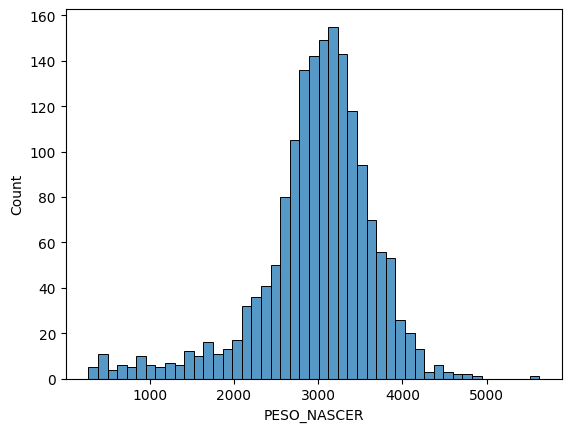

In [18]:
# Histograma
sns.histplot(dados.PESO_NASCER)

In [19]:
# IG_OBSTETRA
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.IG_OBSTETRA.describe()

,IG_OBSTETRA
count,1689.000000
mean,37.857904
std,3.436104
min,0.000000
25%,37.000000
50%,39.000000
75%,40.000000
max,42.000000


<Axes: xlabel='IG_OBSTETRA', ylabel='Count'>

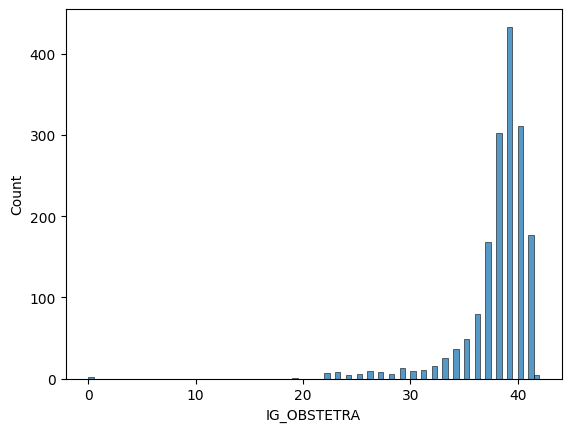

In [20]:
# Histograma
sns.histplot(dados.IG_OBSTETRA)

In [21]:
#  Limpeza de dados - 2 casos com IG = 0
dados.IG_OBSTETRA.value_counts()

,count
IG_OBSTETRA,
39.0,433
40.0,311
38.0,302
41.0,177
37.0,168
36.0,80
35.0,49
34.0,37
33.0,26


In [23]:
#  Limpeza de dados
#  Preencher com null (nan) os valores 0
#dados.IG_OBSTETRA.replace(0, np.nan, inplace=True)
dados['IG_OBSTETRA'] = dados['IG_OBSTETRA'].replace(0, np.nan)
dados.IG_OBSTETRA.describe()

,IG_OBSTETRA
count,1687.000000
mean,37.902786
std,3.180984
min,19.000000
25%,37.000000
50%,39.000000
75%,40.000000
max,42.000000


<Axes: xlabel='IG_OBSTETRA', ylabel='Count'>

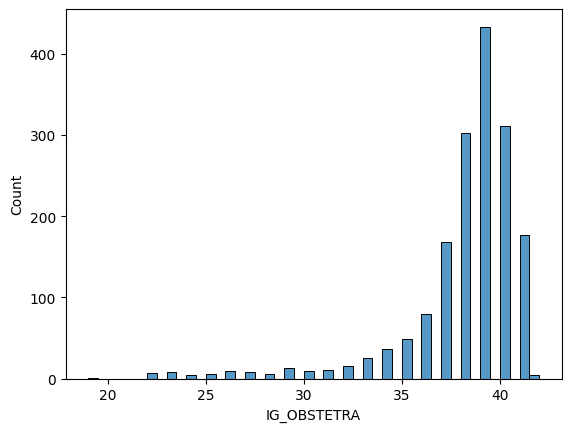

In [24]:
# Histograma
sns.histplot(dados.IG_OBSTETRA)

In [25]:
# IG_PEDIATRA
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.IG_PEDIATRA.describe()

,IG_PEDIATRA
count,1706.000000
mean,37.941970
std,3.189908
min,9.000000
25%,37.000000
50%,39.000000
75%,40.000000
max,42.000000


<Axes: xlabel='IG_PEDIATRA', ylabel='Count'>

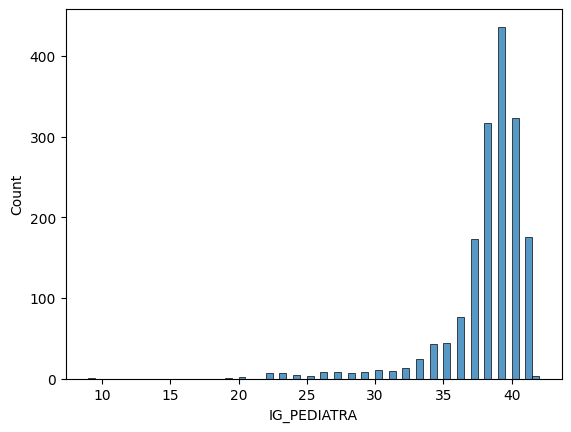

In [26]:
# Histograma
sns.histplot(dados.IG_PEDIATRA)

In [28]:
#  Limpeza de dados
#  Preencher com null (nan) os valores 9
#dados.IG_PEDIATRA.replace(9, np.nan, inplace=True)
dados['IG_PEDIATRA'] = dados['IG_PEDIATRA'].replace(9, np.nan)
dados.IG_PEDIATRA.describe()

,IG_PEDIATRA
count,1705.000000
mean,37.958944
std,3.112817
min,19.000000
25%,37.000000
50%,39.000000
75%,40.000000
max,42.000000


<Axes: xlabel='IG_PEDIATRA', ylabel='Count'>

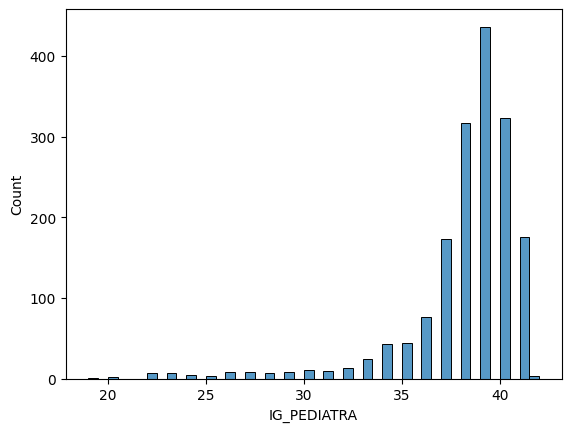

In [29]:
# Histograma
sns.histplot(dados.IG_PEDIATRA)

**Numéricas continuas**

In [30]:
# DURACAO_INT
# Explorar medidas resumo - (média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil, máximo)
dados.DURACAO_INT.describe()

,DURACAO_INT
count,1709.000000
mean,3.019051
std,4.320177
min,0.768750
25%,1.606250
50%,2.070833
75%,2.852778
max,62.537500


In [31]:
# analisar os casos
dados.DURACAO_INT

,DURACAO_INT
0,0.768750
1,0.773611
2,0.798611
3,0.807639
4,0.815972
...,...
1704,37.604167
1705,45.618750
1706,47.984028
1707,54.895833


In [34]:
# Vamos arrendodar para dias inteiros
dados.DURACAO_INT = dados.DURACAO_INT.round(0) # arredondar para inteiro

In [35]:
# analisar os casos
dados.DURACAO_INT

,DURACAO_INT
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1704,38.0
1705,46.0
1706,48.0
1707,55.0


# Recodificação de variáveis

In [36]:
# TIPO_PARTO - Contando a quantidade de casos por categoria
dados.TIPO_PARTO.value_counts()

,count
TIPO_PARTO,
1,1056
2,653


In [38]:
# Trocar os números pelo conteúdo das categorias, o python não precisa que as categorias sejam códigos (apenas para regressão)
# Já se sabe pela documentação da Base de dados que:
# 1 = partos vaginais
# 2 = partos cesáreos

#dados.TIPO_PARTO.replace(1, 'Parto Normal', inplace=True)
#dados.TIPO_PARTO.replace(2, 'Parto Cesáreo', inplace=True)
#dados.TIPO_PARTO.value_counts()
# Substituir os códigos por categorias, sem usar inplace
dados['TIPO_PARTO'] = dados['TIPO_PARTO'].replace(1, 'Parto Normal')
dados['TIPO_PARTO'] = dados['TIPO_PARTO'].replace(2, 'Parto Cesáreo')

# Verificar a distribuição das categorias
dados.TIPO_PARTO.value_counts()

,count
TIPO_PARTO,
Parto Normal,1056
Parto Cesáreo,653


In [39]:
# GEMELAR - Contando a quantidade de casos por categoria
dados.GEMELAR.value_counts()

,count
GEMELAR,
0,1641
1,68


In [41]:
# GEMELAR - recodificar ==>   0 = Não, 1 = Sim
#dados.GEMELAR.replace(0, 'Não', inplace=True)
#dados.GEMELAR.replace(1, 'Sim', inplace=True)
#dados.GEMELAR.value_counts()
# Substituir os valores diretamente, sem usar inplace
dados['GEMELAR'] = dados['GEMELAR'].replace(0, 'Não')
dados['GEMELAR'] = dados['GEMELAR'].replace(1, 'Sim')

# Verificar a distribuição das categorias
dados.GEMELAR.value_counts()

,count
GEMELAR,
Não,1641
Sim,68


In [42]:
# ALTO_RISCO - Contando a quantidade de casos por categoria
dados.ALTO_RISCO.value_counts()

,count
ALTO_RISCO,
não,889
sim,799
nao,11
Nao,7
Sim,2
Não,1


In [44]:
# ALTO_RISCO - Limpeza e Tratamento de dados, recodificando valores de texto
#dados.ALTO_RISCO.replace('não', 'Não', inplace=True)
#dados.ALTO_RISCO.replace('nao', 'Não', inplace=True)
#dados.ALTO_RISCO.replace('Nao', 'Não', inplace=True)
#dados.ALTO_RISCO.replace('sim', 'Sim', inplace=True)
#dados.ALTO_RISCO.value_counts()
# Substituir as variações diretamente, sem usar inplace
dados['ALTO_RISCO'] = dados['ALTO_RISCO'].replace(['não', 'nao', 'Nao'], 'Não')
dados['ALTO_RISCO'] = dados['ALTO_RISCO'].replace(['sim'], 'Sim')

# Verificar a distribuição das categorias
dados.ALTO_RISCO.value_counts()


,count
ALTO_RISCO,
Não,908
Sim,801


In [45]:
# SEXO - Contando a quantidade de casos por categoria
dados.SEXO.value_counts()

,count
SEXO,
1,853
2,798
0,49
3,9


In [47]:
# SEXO - recodificar ==>
#  0 = missing (não preenchido), 1 = masculino, 2 = feminino, 3 = indeterminado

#  Para análise deste estudo, vamos considerar os valores 0 e 3 como missings (nulos)
#  Preencher com null (nan) os valores 0 e 3
#dados.SEXO.replace(0, np.nan, inplace=True)
#dados.SEXO.replace(3, np.nan, inplace=True)

# SEXO - recodificar ==>   1 = Masculino, 2 = Feminino
#dados.SEXO.replace(1, 'Masculino', inplace=True)
#dados.SEXO.replace(2, 'Feminino', inplace=True)

#dados.SEXO.value_counts()
# Substituir 0 e 3 por NaN diretamente
dados['SEXO'] = dados['SEXO'].replace([0, 3], np.nan)

# Recodificar SEXO: 1 = Masculino, 2 = Feminino
dados['SEXO'] = dados['SEXO'].replace({1: 'Masculino', 2: 'Feminino'})

# Verificar a distribuição das categorias
dados.SEXO.value_counts()


,count
SEXO,
Masculino,853
Feminino,798


In [48]:
# CM_LACERACAO_CANAL - Contando a quantidade de casos por categoria
dados.CM_LACERACAO_CANAL.value_counts()

,count
CM_LACERACAO_CANAL,
0.0,1147
1.0,253
2.0,126
3.0,27
4.0,1


In [50]:
# CM_LACERACAO_CANAL - recodificar ==>   0 = não houve, 1 = Grau I, 2 - Grau II, 3 - Grau III, 4 Grau IV
#dados.CM_LACERACAO_CANAL.replace(0, 'Não houve', inplace=True)
#dados.CM_LACERACAO_CANAL.replace(1, 'Grau I', inplace=True)
#dados.CM_LACERACAO_CANAL.replace(2, 'Grau II', inplace=True)
#dados.CM_LACERACAO_CANAL.replace(3, 'Grau III', inplace=True)
#dados.CM_LACERACAO_CANAL.replace(4, 'Grau IV', inplace=True)
#dados.CM_LACERACAO_CANAL.value_counts()
# Substituir os valores diretamente, sem usar inplace
dados['CM_LACERACAO_CANAL'] = dados['CM_LACERACAO_CANAL'].replace({0: 'Não houve',
                                                                   1: 'Grau I',
                                                                   2: 'Grau II',
                                                                   3: 'Grau III',
                                                                   4: 'Grau IV'})

# Verificar a distribuição das categorias
dados.CM_LACERACAO_CANAL.value_counts()


,count
CM_LACERACAO_CANAL,
Não houve,1147
Grau I,253
Grau II,126
Grau III,27
Grau IV,1


In [51]:
# LIGADURACORDAO - Contando a quantidade de casos por categoria
dados.LIGADURACORDAO.value_counts()

,count
LIGADURACORDAO,
2,1103
1,500
0,106


In [53]:
# LIGADURACORDAO - recodificar ==>   0 = Não, 1 = Sim, 2 = Não se aplica ou não informado
#dados.LIGADURACORDAO.replace(0, 'Não', inplace=True)
#dados.LIGADURACORDAO.replace(1, 'Sim', inplace=True)

#  Para análise deste estudo, vamos considerar os valores 2 como missings (nulos)
#  Preencher com null (nan) o valor 2
#dados.LIGADURACORDAO.replace(2, np.nan, inplace=True)

#dados.LIGADURACORDAO.value_counts()
# Substituir diretamente os valores na coluna, sem usar inplace
dados['LIGADURACORDAO'] = dados['LIGADURACORDAO'].replace({0: 'Não', 1: 'Sim', 2: np.nan})

# Verificar a distribuição das categorias
dados.LIGADURACORDAO.value_counts()

,count
LIGADURACORDAO,
Sim,500
Não,106


In [54]:
# LC_MOTIVO - Contando a quantidade de casos por categoria
dados.LC_MOTIVO.value_counts()

,count
LC_MOTIVO,
0,1656
3,29
2,17
1,7


In [56]:
# LC_MOTIVO - recodificar ==>   0 = Não se aplica ou não informado, 1 Mãe soropositiva, 2 RN asfixia, 3 Aloimunização Rh
#dados.LC_MOTIVO.replace(1, 'Mãe soropositiva', inplace=True)
#dados.LC_MOTIVO.replace(2, 'RN com asfixia', inplace=True)
#dados.LC_MOTIVO.replace(3, 'Aloimunização Rh', inplace=True)

#  Para análise deste estudo, vamos considerar os valores 0 como missings (nulos)
#  Preencher com null (nan) o valor 0
#dados.LC_MOTIVO.replace(0, np.nan, inplace=True)

#dados.LC_MOTIVO.value_counts()
# Substituir os valores diretamente na coluna, sem usar inplace
dados['LC_MOTIVO'] = dados['LC_MOTIVO'].replace({1: 'Mãe soropositiva',
                                                2: 'RN com asfixia',
                                                3: 'Aloimunização Rh',
                                                0: np.nan})

# Verificar a distribuição das categorias
dados.LC_MOTIVO.value_counts()

,count
LC_MOTIVO,
Aloimunização Rh,29
RN com asfixia,17
Mãe soropositiva,7


In [ ]:
# Se precisar: esse código desabilita algumas mensagens de Warning, quando se faz recodificação de variáveis.
# pd.options.mode.chained_assignment = None
# default='warn'

# Criação de novas variáveis

In [57]:
# Localizar e visualizar um sub-conjunto de dados
dados.loc[ (dados.APGAR1 <  7 ) ]

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,APGAR5,UTI_RN,LIGADURACORDAO,LC_MOTIVO,EQUIPAMENTO_A,EQUIPAMENTO_B,UBS,BAIRRO,LATITUDE,LONGITUDE
4,2013-12-05,2013-12-06,1.0,1,0.0,36.0,36.0,Não,Parto Normal,0,...,8.0,0,Sim,NaN,620.0,NaN,1.0,Alto dos Pinheiros,-19.907129,-43.907127
7,2013-10-07,2013-10-08,1.0,2,1.0,39.0,39.0,Não,Parto Normal,0,...,9.0,0,Sim,NaN,3160.0,3135.0,0.0,Inconfidência,-19.964521,-43.919651
42,2013-12-06,2013-12-07,1.0,3,2.0,39.0,39.0,Não,Parto Normal,0,...,8.0,0,Sim,NaN,NaN,NaN,58.0,Mariano de Abreu,-19.832577,-43.981976
52,2014-04-13,2014-04-14,1.0,2,1.0,22.0,22.0,Não,Parto Normal,0,...,1.0,0,Não,NaN,2390.0,2400.0,1.0,Bandeirantes,-19.913586,-43.947582
54,2014-04-13,2014-04-14,1.0,2,1.0,22.0,22.0,Não,Parto Normal,0,...,1.0,0,Não,NaN,NaN,3410.0,136.0,Paraíso,-19.888601,-43.901932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,2013-10-07,2013-11-01,25.0,3,3.0,26.0,27.0,Sim,Parto Normal,0,...,2.0,0,Sim,NaN,NaN,2895.0,123.0,Urca,-19.901760,-43.939434
1700,2014-05-08,2014-06-09,33.0,2,1.0,41.0,41.0,Não,Parto Normal,0,...,9.0,0,Sim,NaN,3275.0,3100.0,0.0,São Gabriel,-19.978437,-44.030212
1701,2014-07-26,2014-08-28,33.0,1,0.0,38.0,38.0,Sim,Parto Cesáreo,0,...,9.0,0,NaN,NaN,NaN,NaN,126.0,Jardim Montanhês,-19.808807,-44.002148
1702,2014-06-26,2014-07-29,33.0,4,1.0,40.0,40.0,Sim,Parto Normal,0,...,8.0,0,NaN,NaN,2960.0,2875.0,2.0,Dom Bosco,-19.927525,-43.970512


In [58]:
# BAIXO_APGAR1
# Localizar um sub-conjunto de dados, criar uma nova variável e atribuir um valor 'qualquer'
dados.loc[ (dados.APGAR1 <  7 ), 'BAIXO_APGAR1' ] = 'Sim'
dados.loc[ (dados.APGAR1 >=  7 ), 'BAIXO_APGAR1' ] = 'Não'

# para conferir
dados.BAIXO_APGAR1.value_counts()

,count
BAIXO_APGAR1,
Não,1445
Sim,206


In [59]:
# BAIXO_PESO
# Localizar um sub-conjunto de dados, criar uma nova variável e atribuir um valor 'qualquer'
dados.loc[ (dados.PESO_NASCER <  2500 ), 'BAIXO_PESO' ] = 'Sim'
dados.loc[ (dados.PESO_NASCER >=  2500 ), 'BAIXO_PESO' ] = 'Não'

# para conferir
dados.BAIXO_APGAR1.value_counts()

,count
BAIXO_APGAR1,
Não,1445
Sim,206


In [60]:
# PREMATURO_OBS
# Localizar um sub-conjunto de dados, criar uma nova variável e atribuir um valor 'qualquer'
dados.loc[ (dados.IG_OBSTETRA <=  36 ), 'PREMATURO_OBS' ] = 'Sim'
dados.loc[ (dados.IG_OBSTETRA >  36 ), 'PREMATURO_OBS' ] = 'Não'

# para conferir
dados.PREMATURO_OBS.value_counts()

,count
PREMATURO_OBS,
Não,1396
Sim,291


In [61]:
# IG_TERMO
# Localizar um sub-conjunto de dados, criar uma nova variável e atribuir um valor 'qualquer'
dados.loc[ (dados.IG_OBSTETRA <=  36 ), 'IG_TERMO' ] = 'Prematuro'
dados.loc[ (dados.IG_OBSTETRA >=  39 ), 'IG_TERMO' ] = 'Termo'

dados.loc[ ((dados.IG_OBSTETRA >= 37) & (dados.IG_OBSTETRA <= 38) ), 'IG_TERMO' ] = 'Termo-precoce'

# para conferir
dados.IG_TERMO.value_counts()

,count
IG_TERMO,
Termo,926
Termo-precoce,470
Prematuro,291


In [62]:
# Vamos criar uma variável nova, pois o teste de McNemar exige variáveis com categorias iguais.

# PARTO_CESAREO
# Localizar um sub-conjunto de dados, criar uma nova variável e atribuir um valor 'qualquer'
dados.loc[ (dados.TIPO_PARTO == 'Parto Cesáreo' ), 'PARTO_CESAREO' ] = 'Sim'
dados.loc[ (dados.TIPO_PARTO == 'Parto Normal' ), 'PARTO_CESAREO' ] = 'Não'

# para conferir
dados.PARTO_CESAREO.value_counts()

,count
PARTO_CESAREO,
Não,1056
Sim,653


In [63]:
# CESAREAS_PREVIAS conferir
dados.CESAREAS_PREVIAS.value_counts()

,count
CESAREAS_PREVIAS,
0.0,1364
1.0,255
2.0,66
3.0,10
4.0,6
5.0,1


In [64]:
# HOUVE_CESAREAS
# Localizar um sub-conjunto de dados, criar uma nova variável e atribuir um valor 'qualquer'
dados.loc[ (dados.CESAREAS_PREVIAS > 0 ), 'HOUVE_CESAREA' ] = 'Sim'
dados.loc[ (dados.CESAREAS_PREVIAS == 0 ), 'HOUVE_CESAREA' ] = 'Não'

# para conferir
dados.HOUVE_CESAREA.value_counts()

,count
HOUVE_CESAREA,
Não,1364
Sim,338


In [65]:
# CM_LACERACAO_CANAL conferir
dados.CM_LACERACAO_CANAL.value_counts()

,count
CM_LACERACAO_CANAL,
Não houve,1147
Grau I,253
Grau II,126
Grau III,27
Grau IV,1


In [66]:
# HOUVE_LACERACAO
# Localizar um sub-conjunto de dados, criar uma nova variável e atribuir um valor 'qualquer'
dados.loc[ (dados.CM_LACERACAO_CANAL == 'Não houve' ), 'HOUVE_LACERACAO' ] = 'Não'
dados.loc[ (dados.CM_LACERACAO_CANAL == 'Grau I' ), 'HOUVE_LACERACAO' ] = 'Sim'
dados.loc[ (dados.CM_LACERACAO_CANAL == 'Grau II' ), 'HOUVE_LACERACAO' ] = 'Sim'
dados.loc[ (dados.CM_LACERACAO_CANAL == 'Grau III' ), 'HOUVE_LACERACAO' ] = 'Sim'
dados.loc[ (dados.CM_LACERACAO_CANAL == 'Grau IV' ), 'HOUVE_LACERACAO' ] = 'Sim'

# para conferir
dados.HOUVE_LACERACAO.value_counts()

,count
HOUVE_LACERACAO,
Não,1147
Sim,407


In [67]:
# PARTOS conferir
dados.PARTOS.value_counts()

,count
PARTOS,
0.0,780
1.0,523
2.0,242
3.0,92
4.0,38
5.0,21
6.0,4
7.0,4
8.0,2


In [68]:
# PARIDADE (partos): Nulípara, Primípara, Multípara

# Localizar um sub-conjunto de dados, criar uma nova variável e atribuir um valor 'qualquer'
dados.loc[ (dados.PARTOS == 0 ), 'PARIDADE' ] = 'Nulípara'
dados.loc[ (dados.PARTOS == 1 ), 'PARIDADE' ] = 'Primípara'
dados.loc[ (dados.PARTOS > 1 ), 'PARIDADE' ] = 'Multípara'

# para conferir
dados.PARIDADE.value_counts()

,count
PARIDADE,
Nulípara,780
Primípara,523
Multípara,405


# Salvar os dados atuais em um novo arquivo

In [69]:
# listar o DataFrame com a Limpeza e o tratamento de dados realizado
dados

,DT_INTERNACAO,DT_ALTA,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,ALTO_RISCO,TIPO_PARTO,HIPERTENSAO,...,LATITUDE,LONGITUDE,BAIXO_APGAR1,BAIXO_PESO,PREMATURO_OBS,IG_TERMO,PARTO_CESAREO,HOUVE_CESAREA,HOUVE_LACERACAO,PARIDADE
0,2014-01-20,2014-01-21,1.0,2,1.0,38.0,38.0,Sim,Parto Normal,0,...,-19.915533,-43.967018,Não,Não,Não,Termo-precoce,Não,Não,Não,Primípara
1,2014-05-21,2014-05-22,1.0,1,0.0,36.0,36.0,Sim,Parto Normal,0,...,-20.015308,-44.031117,Não,Não,Sim,Prematuro,Não,Não,Não,Nulípara
2,2014-04-13,2014-04-14,1.0,2,1.0,39.0,39.0,Não,Parto Normal,0,...,-19.895012,-44.019329,Não,Não,Não,Termo,Não,Sim,Sim,Primípara
3,2013-12-04,2013-12-05,1.0,2,1.0,41.0,41.0,Não,Parto Normal,0,...,-19.973650,-44.024056,Não,Não,Não,Termo,Não,Não,Sim,Primípara
4,2013-12-05,2013-12-06,1.0,1,0.0,36.0,36.0,Não,Parto Normal,0,...,-19.907129,-43.907127,Sim,Não,Sim,Prematuro,Não,Não,Não,Nulípara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,2014-07-05,2014-08-12,38.0,2,1.0,38.0,38.0,Não,Parto Normal,0,...,-19.805260,-43.964157,Não,Não,Não,Termo-precoce,Não,Não,Sim,Primípara
1705,2014-04-25,2014-06-10,46.0,2,1.0,29.0,34.0,Sim,Parto Cesáreo,0,...,-19.952906,-43.998699,Sim,Sim,Sim,Prematuro,Sim,Não,Não,Primípara
1706,2013-11-04,2013-12-22,48.0,2,1.0,26.0,32.0,Sim,Parto Cesáreo,0,...,-19.890446,-43.956734,Não,Sim,Sim,Prematuro,Sim,Não,Não,Primípara
1707,2013-10-04,2013-11-28,55.0,3,0.0,27.0,34.0,Sim,Parto Cesáreo,0,...,-19.906525,-43.889401,Não,Não,Sim,Prematuro,Sim,Não,Não,Nulípara


In [71]:
# salvar em excel, um novo arquivo, com os dados tratados
nome_arquivo = 'BD_PARTOS_corrigida.xlsx'
dados.to_excel(nome_arquivo)
files.download(nome_arquivo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>